[*********************100%%**********************]  1 of 1 completed


Root Mean Squared Error: 371.5125251245158


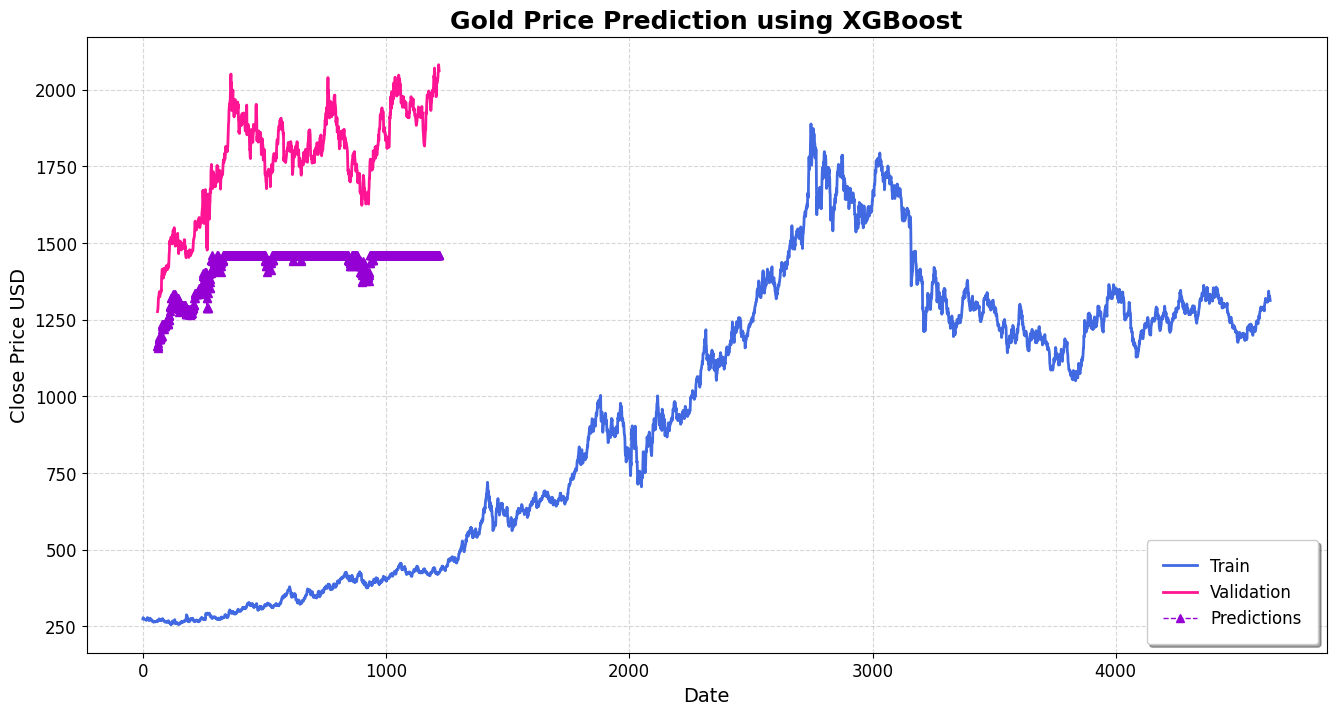

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Step 1: Load the data
gold_data = yf.download('GC=F', start='2000-01-01', end='2024-01-01')

# Use only the 'Close' price for prediction
data = gold_data['Close'].values.reshape(-1, 1)

# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.01, max_depth=5, subsample=0.8)

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Step 8: Evaluate the model
rmse = np.sqrt(np.mean((predictions - scaler.inverse_transform(y_test.reshape(-1, 1)))**2))
print(f"Root Mean Squared Error: {rmse}")

# Step 9: Plot the results with enhanced appearance

# Convert the arrays back into a DataFrame
train = pd.DataFrame(data[:len(y_train)], columns=['Close'])
valid = pd.DataFrame(data[len(y_train):], columns=['Close'])

# Trim the 'valid' DataFrame to match the length of predictions
valid = valid.iloc[-len(predictions):]

# Add the predictions to the 'valid' DataFrame
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Gold Price Prediction using XGBoost', fontsize=18, fontweight='bold')

# Plot the training data
plt.plot(train['Close'], label='Train', color='royalblue', linestyle='-', linewidth=2)

# Plot the actual validation data
plt.plot(valid['Close'], label='Validation', color='deeppink', linestyle='-', linewidth=2)

# Plot the predictions
plt.plot(valid['Predictions'], label='Predictions', color='darkviolet', linestyle='--', linewidth=1, marker='^')

# Customize x and y labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD', fontsize=14)

# Add grid and customize it
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend with custom style
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True, borderpad=1)

# Customize the ticks on x and y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()
